<center><h1 style="color:#a3a948">Proyecto Machine Learning</h1></center>

<table>
  <tr>
    <th><img SRC="MAL.png"/></th>
    <th><p style="text-aling:justify">El presente documento se crea para realizar los procesos de reducción de variables para verificar la viabilidad de implementar un alogoritmo de regresión lineal simple o múltiple</p></th>
  </tr>
</table>

<center><h4 style="color:#ce1836">Universidad Castro Carazo</h4></center>

<h3 style="color:#ce1836">1. Carga de Librerias</h3>

<p>En primera instancia para el adcuado desarrollo de este proyecto es necesario generar la instalacion de dos librerias segun se detalla a continuacion:</p>

<table>
  <tr>
    <td> <img src="info64.png" alt="Enlace para consulta"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'><a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">Libreria SKlearn, modelo de regresion lineal. Insumo para lectura</a></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'>Instruccion: Por favor proceda a realizar la lectura del enlace adjunto para un mayor entendimiento de la funcionalidad, asimismo, en caso de ser necesario proceda a realizar una indagacion adicional.</td>
  </tr>
</table>

In [37]:
#/***********************************************************/#
#/****Librerias para el manejo de DataFrame y miselaneos.****/#
#/***********************************************************/#
import pandas as pd       #Se usa para el manejo de los DataFrame
import numpy as np        #Se usa para el manejo de las estructuras de datos (Array, Listas, Tuplas, Diccionarios)
import matplotlib.pyplot as plt #Se usa para crear las graficas.
import matplotlib as mpl

#/********************************************************/#
#/****Librerias a ser utilizadas para el modelo de ML.****/#
#/********************************************************/#
from sklearn import linear_model  #Esta es una importacion especifica para aplicar regresiones lineales
from sklearn.preprocessing import StandardScaler #Esta es una importacion especifica para estadarizar valores
from sklearn.decomposition import PCA #Esta es una importacion especifica para implementar el PCA

<h3 style="color:#ce1836">3. Importación del Set de Datos</h3>

In [38]:
credit = pd.read_excel("credit.xlsx")
credit.drop(['Unnamed: 0'], axis=1,inplace=True)
credit.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default


In [39]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month (Y)'],
      dtype='object')

In [40]:
credit = credit.rename(columns={'default payment next month (Y)':'Y'})

<h3 style="color:#ce1836">3. Reducción  de Características</h3>

<p>Uno de los elementos principales para generar mayor eficiencia en los algoritmos de Machine Learning, se centra en la reducción de las características, para esto vamos a utilizar el algoritmo de Analisis Principal de Componentes (PCA), en este caso se manejaran 2 componentes principales.
</br>
</br>
Una vez aplicado ese algoritmo se procederá al analisis de la viabilidad de implementar un algoritmo de regresion lineal simple o multiple.</p>

<table>
   <tr>
    <th><p>Insumo para analisis sobre el PCA:</p></th>
    <th><p>El análisis de componentes principales (PCA) es un método para reducir la dimensionalidad de los datos y se utiliza para mejorar la visualización de datos y acelerar el entrenamiento del modelo de aprendizaje automático.</th>
    <th><a href="https://builtin.com/machine-learning/pca-in-python">Referencia Web</a></th>
  </tr>
</table>

In [41]:
features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
             'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
            'PAY_AMT5', 'PAY_AMT6']

# Separating out the features
x = credit.loc[:, features].values

# Separating out the target
y = credit.loc[:,['Y']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
print (x)

[[-1.12642689 -1.20840397  1.77647823 ... -0.34328006 -0.29509662
  -0.25656677]
 [-0.35402725 -0.99677208 -0.89437003 ... -0.27310016 -0.29509662
  -0.15692781]
 [-0.58574714 -0.15024451 -0.00408727 ... -0.27310016 -0.23589944
  -0.00746937]
 ...
 [-0.27678728 -1.20840397  0.88619548 ... -0.27302998 -0.23951047
  -0.20609964]
 [-0.43126721 -0.89095613 -0.00408727 ... -0.22411459 -0.18197081
  -0.16649315]
 [ 0.26389247 -0.67932424 -0.00408727 ... -0.20965753 -0.29438625
   0.0036902 ]]


In [42]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2'])

principalDf.head(10)

,principal_component_1,principal_component_2
0,-1.870264,-0.761316
1,-0.767841,-2.018181
2,-0.832976,-0.968937
3,-0.222358,-0.818198
4,-0.713468,0.111330
5,-0.213885,-0.812280
6,13.819350,6.281718
7,-1.785743,-0.355061
8,-0.697268,-1.563650
9,-2.741160,1.646896


In [43]:
finalDf = pd.concat([principalDf, credit[['Y']]], axis = 1)
finalDf.head(10)

,principal_component_1,principal_component_2,Y
0,-1.870264,-0.761316,default
1,-0.767841,-2.018181,default
2,-0.832976,-0.968937,not default
3,-0.222358,-0.818198,not default
4,-0.713468,0.111330,not default
5,-0.213885,-0.812280,not default
6,13.819350,6.281718,not default
7,-1.785743,-0.355061,not default
8,-0.697268,-1.563650,not default
9,-2.741160,1.646896,not default


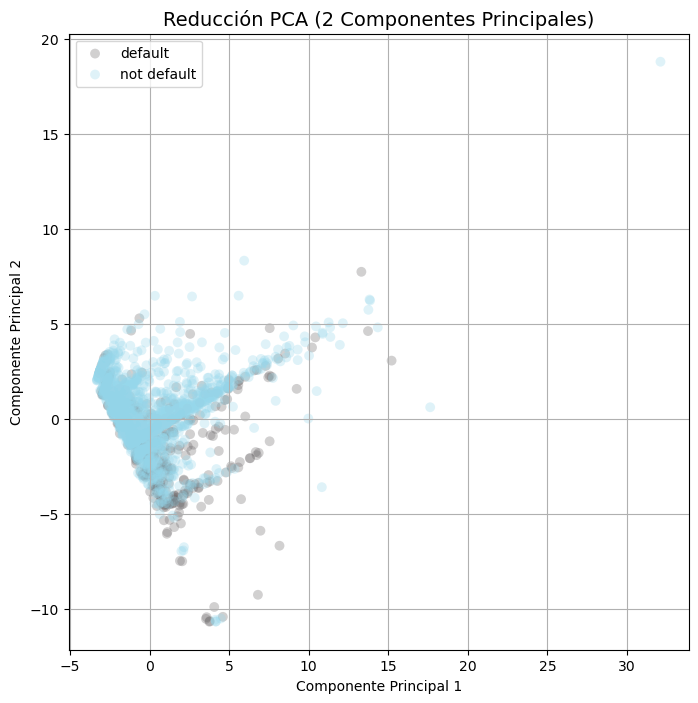

In [44]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Componente Principal 1', fontsize = 10)
ax.set_ylabel('Componente Principal 2', fontsize = 10)
ax.set_title('Reducción PCA (2 Componentes Principales)', fontsize = 14)

targets = ['default', 'not default']
colors = ['#686466','#96d7eb']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1']
               , finalDf.loc[indicesToKeep, 'principal_component_2']
               , c = color
               , s = 50
               ,alpha=0.3
               ,edgecolors='none')
ax.legend(targets)
ax.grid()

La varianza explicada le indica cuánta información (varianza) se puede atribuir a cada uno de los componentes principales. Esto es importante porque si bien puedes convertir un espacio de 23 dimensiones en un espacio de dos dimensiones, pierdes parte de la varianza (información) cuando haces esto. Al usar el atributo explained_variance_ratio_, puede ver que el primer componente principal contiene el 0.33 por ciento de la varianza y el segundo componente principal contiene el 0.20 por ciento de la varianza. Juntos, los dos componentes contienen el 0.53 por ciento de la información.

In [45]:
pca.explained_variance_ratio_

array([0.3357123 , 0.20397228])

<h3 style="color:#ce1836">4. Analisis Implementacion MRL</h3>

<p>Para la implementacion de un modelo de regresion lineal, es fundamental disponer de la variable dependiente en dominio numerico y consecutivo, esto es requerido para la implementacion del MRL simple o multiple, caso contrario se podria estar ante la posibilidad de implementar un MRL Logistico, o un algoritmo de clasificacion, esto por cuanto la variable a predecir unicamente contiene dos posibles valores.

</br>

Por lo tanto:</p>

<table>
  <tr>
    <td> <img src="fallas.png" alt="Enlace para consulta"/></td>
    <td Style='text-align: justify; font-style: normal; font-weight: normal'>CON ESTE SET DE DATOS NO ES VIABLE IMPLEMENTAR UN ALGORIMO DE REGRESION LINEAL SIMPLE O MULTIPLE</td>
  </tr>
</table>

<h3 style="color:#ce1836">5. Comprobación sobre la Implementacion MRL</h3>

<p>Con el proposito de demostrar que nos es viable el desarrollo del MRL Simple o MRL Multiple se genera el codigo siguiente.

</br>
</br>
Visualización de los datos del Data Frame una vez aplicado el PCA:</p>

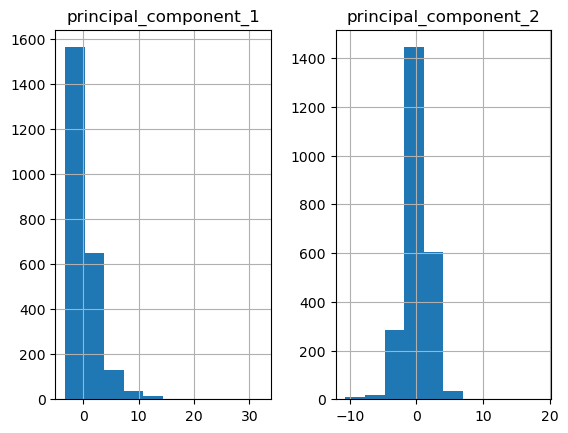

In [46]:
viz = finalDf[['principal_component_1','principal_component_2','Y']]
viz.hist()
plt.show()

<p Style='text-align: justify; font-style: normal; font-weight: normal'> Como la visualizacion nos da una nocion pero no lo suficientemente buena de su distribucion vamos a realizar una graficacion para conocer como estan distribuidas estas variables y de esta forma seleccionar la mas adecuada para el modelo de regresion.
<br>
<br>    
Para conocer esto, vamos a generar una grafica de dispercion para conocer la relacion que existe entre cada una de las variables independientes con la variable dependiente, siendo que atra ves de esto se busca una distribucion homogenea en los datos y no una ditribucion que se dibuja como una linea.
</p>

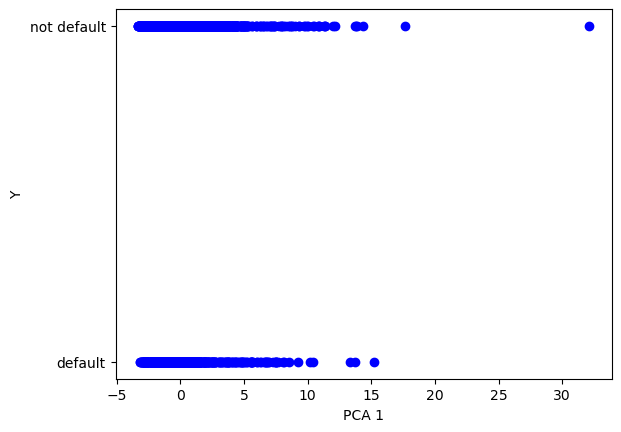

In [47]:
plt.scatter(finalDf.principal_component_1, finalDf.Y,  color='blue')
plt.xlabel("PCA 1")
plt.ylabel("Y")
plt.show()

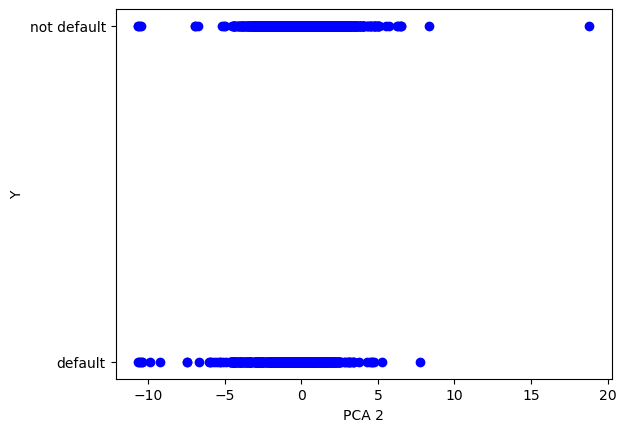

In [48]:
plt.scatter(finalDf.principal_component_2, finalDf.Y,  color='blue')
plt.xlabel("PCA 2")
plt.ylabel("Y")
plt.show()

<table>
  <tr>
    <th><img SRC="info64.png"/></th>
    <th><p style="text-aling:justify">Como se puede aprecier al momento de graficar los datos para conocer su distribución, se visualiza que por la conformación de la variable Y, no es posible motivar la implementacion de alguno de los algoritmos de machine learning abordados durante el desarrollo del curso.</p></th>
  </tr>
</table>
